In [7]:
import nibabel as nib
import neuromaps.transforms as transforms

# 输入您的z map文件路径
control_all = '../results/mni152_to_fsaverage/control_all_z_size_level_thresh.nii'


In [10]:
import neuromaps.images as images
controls = images.load_nifti(control_all)

In [15]:
controls.files_types

(('image', '.nii'),)

In [18]:
controls_surf = transforms.mni152_to_fsaverage(control_all, '10k')

controls_surf 

(<nibabel.gifti.gifti.GiftiImage at 0x30a2e7680>,
 <nibabel.gifti.gifti.GiftiImage at 0x16d2b6db0>)

In [40]:
lh_data = controls_surf[0]
lh_data

In [42]:
rh_data = controls_surf[1]
rh_data

In [48]:
output_path = '../results/mni152_to_fsaverage/rh_data_output.gii'
nib.save(rh_data, output_path)

In [44]:
from nilearn.datasets import load_fsaverage

fsaverage_meshes = load_fsaverage()

In [45]:
import numpy as np

from nilearn.datasets import load_fsaverage_data

curv_sign = load_fsaverage_data(data_type="curvature")
for hemi, data in curv_sign.data.parts.items():
    curv_sign.data.parts[hemi] = np.sign(data)

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_46115/2131530762.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


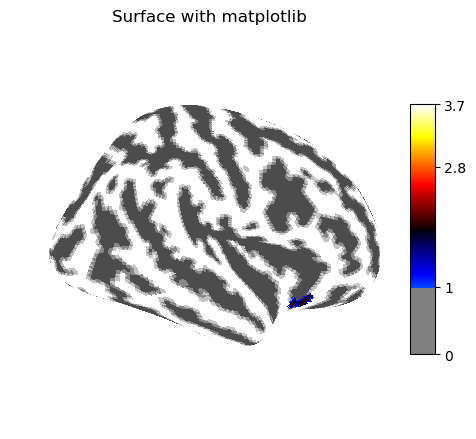

In [59]:
from nilearn.plotting import plot_surf_stat_map

# In this example we will only plot the right hemisphere
hemi = "right"

fig = plot_surf_stat_map(
    stat_map=output_path,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title="Surface with matplotlib",
    colorbar=True,
    threshold=1.0,
    bg_map=curv_sign,
)
fig.show()


In [36]:
from neuromaps import images

In [4]:
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()

In [5]:
surf_mesh=fsaverage['pial_left']
surf_mesh

'/opt/anaconda3/lib/python3.12/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz'

ValueError: The surf_map does not have the same number of vertices as the mesh.

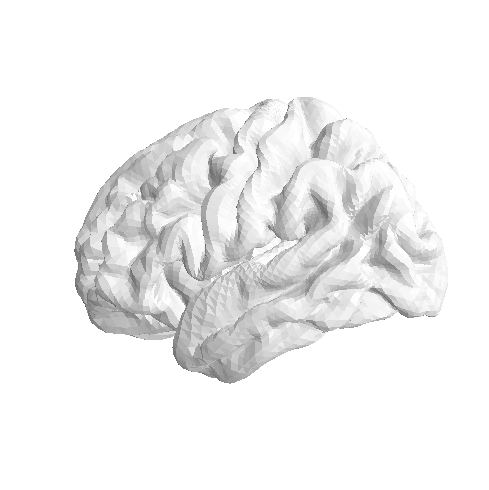

In [6]:
from nilearn import plotting

# 使用保存的 GIFTI 文件进行可视化
plotting.plot_surf_stat_map(
    surf_mesh=fsaverage['pial_left'],                    # 指定表面模板为 fsaverage
    stat_map='../results/mni152_to_fsaverage/left_hemisphere.gii',  # GIFTI 文件路径
    hemi='left',                              # 可视化左半球
    view='lateral',                           # 视角为侧面
    title='Left Hemisphere'
)

In [ ]:

# 可视化右半球
plotting.plot_surf_stat_map(
    surf_mesh='fsaverage',  # 指定表面模板为 fsaverage
    stat_map=right_gii,     # 右半球的 GIFTI 文件
    hemi='right',           # 可视化右半球
    view='lateral',         # 视角为侧面
    title='Right Hemisphere'
)


In [ ]:

# 读取GIFTI文件
gii_file_path = '../results/mni152_to_fsaverage/control_all_z_size_level_thresh.gii'
gii_img = nib.load(gii_file_path)

# 假设你的 GIFTI 文件包含一个数据数组，可以通过 gii_img.darrays 来访问
# 你可以选择第一个数组（如果有多个数组）
gii_data = gii_img.darrays[0].data  # 获取数据

# 创建 fsaverage 大脑表面对象
brain = Brain("fsaverage", "lh", "inflated")


In [ ]:

# 保存 GIFTI 文件为 NIfTI 或将其直接作为 overlay 使用
# 将 .gii 文件作为 overlay 加载
brain.add_overlay(gii_file_path)  # 这里直接使用 GIFTI 文件

# 你也可以使用 NIfTI 文件作为 overlay
# 如果需要，你可以将 gii 数据保存为 nii 格式，再加载为 overlay
# 例如，创建一个 NIfTI 文件
# new_nii = nib.Nifti1Image(gii_data, affine=gii_img.affine)
# new_nii.to_filename('temp_overlay.nii.gz')
# brain.add_overlay('temp_overlay.nii.gz')

# 在这里，你可以设置阈值来控制可视化的显示（例如只显示大于某个值的激活）
brain.add_overlay(gii_file_path, min=5, max=20, sign="pos")

# 如果你想移除 overlay
# brain.overlays["sig"].remove()  # 这里的 "sig" 需要根据你的实际 overlay 名称进行调整
